Describe your data set:
    Jeopardy! is a trivia game show in which contestants must answer in the form of a question. The current incarnation first aired in 1984. The data deails episodes from season 18, 2001 to season 33, 2016 (15 seasons). There are four .csv files used in this report: a contestants.csv which contains a player ID and occupation, a locations.csv which indicates where each player ID was seated in each game, a questions.csv listing the category, text, and answer to each question, and a trend.csv, which shows who picked which question and who was correct. We'll peruse 7,635 players from all over the world and all walks of life, 4,004 contests of thrilling victory and agonizing defeat, and 225,769 questions that span the gamut of human experience. Given the widespread appeal of the game, its reflection of culture, and of course the possible winnings, analysis may prove useful. I downloaded the data from Kaggle, and the contributor, Freddy A. Boulton, had scraped the data from the Jeopardy! archive.

In [2]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline

Question One: How do different occupations fare on Jeopardy!?
    
    The contestants.csv, after being cleansed of NaNs, duplicates, and other unhelpfuls, has 3,833 unique occupational entries. The top ten most common responses are an attorney (239), a senior (128), a graduate student (114), a writer (96), a junior (93), a 12-year-old (76), a stay-at-home mom (75), a teacher (74), a sophomore (57), and a law student (55). College and high school episodes contribute quite a bit, and given that over half the world's lawyers live in the United States, attorneys and law students abound. On the other hand, Jeopardy! has had a theme park ride operator, an ombudsman, an aquatic veterinarian, a pig and chicken farmer, a taxi driver, a color scientist (whatever that is), and a milk plant lab technician, just to name a few. There have been six data analysts and a food stylist. The diversity is staggering. In order to get a handle on this, they were grouped into seven extremely broad categories, generalized using a keyword bank. Unfortunately, some occupations were too specific for the current word bank to include. We are missing the ombudsman, an Orchid specialist, and others. The categories, along with examples of keywords, are:
    
    Stay at home parent - Mom, Dad, Stay-at-home, etc.
    
    Law - Attorney, judge, lawyer, etc.
    
    Education - Teacher, student, professor, etc.
    
    Medicine - Nurse, paramedic, physician, etc.
    
    Humanities - Writer, Human Resources, Arts, etc.
    
    Engineering - Engineer, scientist, technician, etc.
    
    Business - Sales, insurance, management, etc.
    
    Once the occupations were generalized, the mean number of wins was calculated for each field.

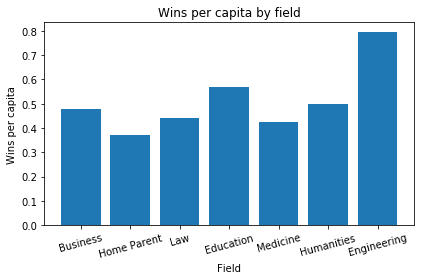

In [15]:
locations = pd.read_csv('locations.csv')
contestants = pd.read_csv('contestants.csv')
contestant_data = pd.DataFrame(contestants)
wins = pd.DataFrame(locations.player_id.value_counts())
occupations = [('dad','Stay at home parent'),('mom','Stay at home parent'),('mother','Stay at home parent'),('father','Stay at home parent'),('homemaker','Stay at home parent'),('housewife','Stay at home parent'),
               ('attorney','Law'),('central','Law'),('appeal','Law'),('lawyer','Law'),('legal','Law'),('law','Law'),('defender','Law'),('judge','Law'),('clerk','Law'),
               ('teacher','Education'),('grader','Education'),('student','Education'),('Ph.D.','Education'),('year','Education'),('academics','Education'),('school','Education'),('instruct','Education'),('senior','Education'),('education','Education'),('junior','Education'),('sophomore','Education'),('freshman','Education'),('educator','Education'),('professor','Education'),('college','Education'),('tutor','Education'),
               ('physician','Medicine'),('nurse','Medicine'),('veterinarian','Medicine'),('surgeon','Medicine'),('medical','Medicine'),('cardiologist','Medicine'),('paramedic','Medicine'),('dermatologist','Medicine'),('dentist','Medicine'),('therapist','Medicine'),('oncologist','Medicine'),('perfusionist','Medicine'),('health','Medicine'),('drug','Medicine'),('doctor','Medicine'),('anesthesiologist','Medicine'),('pediatrician','Medicine'),('psychiatrist','Medicine'),('pharmaceutical','Medicine'),('psychologist','Medicine'),
               ('editor','Humanities'),('reporter','Humanities'),('chef','Humanities'),('freelance','Humanities'),('personal','Humanities'),('scheduler','Humanities'),('waiter','Humanities'),('bookkeeper','Humanities'),('caterer','Humanities'),('human','Humanities'),('transcriber','Humanities'),('publicist','Humanities'),('archivist','Humanities'),('waitress','Humanities'),('attendant','Humanities'),('sailor','Humanities'),('landscaper','Humanities'),('museum','Humanities'),('assistant','Humanities'),('performer','Humanities'),('composer','Humanities'),('captain','Humanities'),('restaurant','Humanities'),('poet','Humanities'),('caregiver','Humanities'),('producer','Humanities'),('counseling','Humanities'),('police','Humanities'),('TV','Humanities'),('policy','Humanities'),('index','Humanities'),('intelligence','Humanities'),('civil','Humanities'),('painter','Humanities'),('coordinator','Humanities'),('writer','Humanities'),('radio','Humanities'),('author','Humanities'),('news','Humanities'),('creative','Humanities'),('content','Humanities'),('officer','Humanities'),('service','Humanities'),('relations','Humanities'),('communications','Humanities'),('playwright','Humanities'),('animator','Humanities'),('investigator','Humanities'),('publisher','Humanities'),('minister','Humanities'),('community','Humanities'),('courier','Humanities'),('fitness','Humanities'),('driver','Humanities'),('nonprofit','Humanities'),('events','Humanities'),('historian','Humanities'),('art','Humanities'),('library','Humanities'),('librarian','Humanities'),('actor','Humanities'),('actress','Humanities'),('journalist','Humanities'),('music','Humanities'),('social','Humanities'),('pastor','Humanities'),('graphic','Humanities'),
               ('engineer','Engineering'),('chemist','Engineering'),('accelerator','Engineering'),('meteorologist','Engineering'),('welder','Engineering'),('IT','Engineering'),('laboratory','Engineering'),('tech','Engineering'),('pharmacist','Engineering'),('developer','Engineering'),('geologist','Engineering'),('pathologist','Engineering'),('statistician','Engineering'),('industrial','Engineering'),('biologist','Engineering'),('astronomer','Engineering'),('technician','Engineering'),('metrologist','Engineering'),('programmer','Engineering'),('environmental','Engineering'),('biochemist','Engineering'),('technical','Engineering'),('research','Engineering'),('urban','Engineering'),('computer','Engineering'),('toxicologist','Engineering'),('data','Engineering'),('software','Engineering'),('scientist','Engineering'),('architect','Engineering'),('business','Business'),('broker','Business'),('analyst','Business'),('realtor','Business'),('manager','Business'),('administrative','Business'),('evaluation','Business'),('bartender','Business'),('billing','Business'),('operations','Business'),('accountant','Business'),('account','Business'),('bookseller','Business'),('consultant','Business'),('customer','Business'),
               ('actuary','Business'),('fundraiser','Business'),('insurance','Business'),('travel','Business'),('supply','Business'),('hotel','Business'),('director','Business'),('marketing','Business'),('payroll','Business'),('administrator','Business'),('budget','Business'),('wealth','Business'),('executive','Business'),('economist','Business'),('corporate','Business'),('entrepreneur','Business'),('financial','Business'),('finance','Business'),('investment','Business'),('manufacturer','Business'),('loan','Business'),('bookstore','Business'),('retail','Business'),('sales','Business'),('bond','Business')
              ]

def fix_occupation(occupations, term):
    result = [occupation for occupation in occupations if term.find(occupation[0]) > -1]
    return result[0][1] if len(result) > 0 else 'Other'

contestant_data.drop_duplicates(subset='player_id', inplace=True)
contestant_data1 = contestant_data.set_index('player_id')
contestant_wins = contestant_data1.join(wins, how='outer')
contestant_wins.dropna(axis=0,how='any',inplace=True)
contestant_wins.rename(index=str, columns={'player_id':'wins'},inplace=True)
contestant_wins['fixed_occupation'] = contestant_wins['occupation'].apply(lambda row: fix_occupation(occupations, row))
contestant_wins['wins'] = contestant_wins['wins'] - 1

group = contestant_wins.groupby('fixed_occupation')
business = group.get_group('Business')
home_parent = group.get_group('Stay at home parent')
law = group.get_group('Law')
education = group.get_group('Education')
medicine = group.get_group('Medicine')
humanities = group.get_group('Humanities')
engineering = group.get_group('Engineering')
other = group.get_group('Other')
#engineering.drop('1',inplace=True)
#engineering['wins'].agg(np.mean)
business_mean = business['wins'].agg(np.mean)
home_parent_mean = home_parent['wins'].agg(np.mean)
law_mean = law['wins'].agg(np.mean)
education_mean = education['wins'].agg(np.mean)
medicine_mean = medicine['wins'].agg(np.mean)
humanities_mean = humanities['wins'].agg(np.mean)
engineering_mean = engineering['wins'].agg(np.mean)
mean_wins = [business_mean, home_parent_mean, law_mean, education_mean, medicine_mean, humanities_mean, engineering_mean]

n_groups = 6
index = np.arange(n_groups+1)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

labels =  [
'Business', 
'Home Parent', 
'Law', 
'Education', 
'Medicine', 
'Humanities', 
'Engineering']

width = 15
labels = tuple(['\n'.join(wrap(l, width)) for l in labels ])
plt.xticks(index, labels, rotation=15)
plt.xlabel('Field')
plt.ylabel('Wins per capita')
plt.title('Wins per capita by field')
plt.bar(index, mean_wins)
plt.tight_layout()
plt.show()



    Engineering disciplines have the most wins per capita (wpc). It is interesting to note that without the seventy-four game win streak by software engineer Ken Jennings, the Engineering wpc drops from .79 to .68. Below is the wpc of the most common non-student occupations. Note that this consists of individuals that responded with exactly those occupations, this does not include similar responses like Mom, a high school teacher, etc.

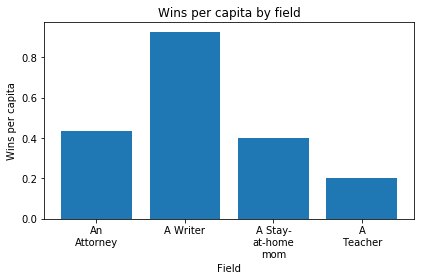

In [10]:
occ_group = contestant_wins.groupby('occupation')
#senior = occ_group.get_group('a senior')
#senior_mean = senior['wins'].agg(np.mean)
attorney = occ_group.get_group('an attorney')
attorney_mean = attorney['wins'].agg(np.mean)
#grad_student = occ_group.get_group('a graduate student')
#grad_student_mean = grad_student['wins'].agg(np.mean)
writer = occ_group.get_group('a writer')
writer_mean = writer['wins'].agg(np.mean)
#junior = occ_group.get_group('a junior')
#junior_mean = junior['wins'].agg(np.mean)
#twelve_yo = occ_group.get_group('a 12-year-old')
#twelve_yo_mean = twelve_yo['wins'].agg(np.mean)
mom = occ_group.get_group('a stay-at-home mom')
mom_mean = mom['wins'].agg(np.mean)
teacher = occ_group.get_group('a teacher')
teacher_mean = teacher['wins'].agg(np.mean)
#sophomore = occ_group.get_group('a sophomore')
#sophomore_mean = sophomore['wins'].agg(np.mean)
#law_student = occ_group.get_group('a law student')
#law_student_mean = law_student['wins'].agg(np.mean)
mean_wins = [attorney_mean, writer_mean, mom_mean, teacher_mean]

n_groups = 3
index = np.arange(n_groups+1)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
labels = ['An Attorney',
'A Writer', 
'A Stay-at-home mom',
'A Teacher']
width = 8 
labels = tuple(['\n'.join(wrap(l, width)) for l in labels ])

plt.xticks(index, labels)
plt.xlabel('Field')
plt.ylabel('Wins per capita')
plt.title('Wins per capita by field')
plt.xticks(index, labels)
plt.bar(index, mean_wins)
plt.tight_layout()
#plt.show()


Question Two: What can one do to gain an advantage on Jeopardy!?
    
    In 1985, Chuck Forrest became known for a strategy that confused opponents. Nicknamed the "Forrest Bounce", he would constantly switch the question category and value to keep competitors off balance. This strategy was also used by Arthur Chu to hunt for Daily Doubles. There's no denying that Chu and Forrest were successful, but does this technique work in general? The trend.csv gives us information on who picked what column, and who was correct. 
    First, we'd like to know how picking the question affects the occurence of being correct. The question picker is correct 34.67% of time, all questions considered. When the column changes, the question picker is correct 34.79% of the time. Note that we are considering all times the column changed, which may be different from deliberate attempts to stymie opponents. Based on this along, the column changing does not seem to help much.

In [3]:
question = pd.read_csv('trend.csv')
question_data = pd.DataFrame(question)
question_data['picker_correct'] = question_data['correct_respondent'] == question_data['clue_picker']
question_data['changed'] = question_data['column'].ne(question_data['column'].shift()).astype(bool)
question_data['game_changed'] = question_data['game_id'].ne(question_data['game_id'].shift())
question_data['switch_good'] = question_data.apply(lambda row: row.correct_respondent == row.clue_picker if (row.changed and (not row.game_changed)) else 'N/A', axis=1)
print(question_data.picker_correct.value_counts())
print(question_data.switch_good.value_counts())



False    153506
True      81462
Name: picker_correct, dtype: int64
N/A      161146
False     48138
True      25684
Name: switch_good, dtype: int64


    What about the hunt for Daily Doubles? Some players assert that controlling Daily Doubles is important. It is generally known that the doubles are in the lower rows, but pandas can tell us exactly how they are distributed. The most common row is four with 38%, then row three with 28%, and row five with 24%. Looking in rows one and two is not recommeded. 

In [50]:
question_data[question_data['wager'] != np.nan].row.value_counts()

4    4520
3    3334
5    2923
2    1091
1       7
Name: row, dtype: int64

In [18]:
qdata = pd.read_csv('questions.csv')
quest_data = pd.DataFrame(qdata)
#quest_text = quest_data['question_text'].str.cat(sep=' ')
pd.options.display.max_rows = 300
quest_data.answer.value_counts()
#quest_data.question_text.value_counts()
#quest_data.category.value_counts()
#quest_data.info()



Chicago                                                 209
China                                                   202
Australia                                               196
India                                                   180
California                                              176
Canada                                                  172
Japan                                                   165
France                                                  163
Mexico                                                  152
Spain                                                   150
Alaska                                                  150
Russia                                                  148
Italy                                                   146
Florida                                                 142
New York                                                138
Texas                                                   136
Brazil                                  

(-0.5, 399.5, 199.5, -0.5)

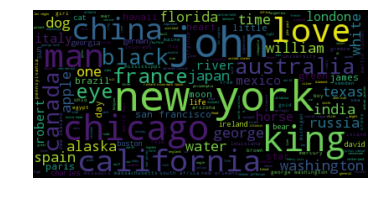

In [14]:
questions = pd.read_csv('questions.csv')
quest_data = pd.DataFrame(questions)
quest_text = quest_data['answer'].str.cat(sep=' ')

stopWords = set(stopwords.words('english') + ['accepted','blue','red'])
words = word_tokenize(quest_text.lower())
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
#print(wordsFiltered)
#text = str(wordsFiltered)
#generate a wordcloud image
wordcloud = WordCloud(max_font_size=50).generate(' '.join(wordsFiltered))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')

# lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(wordsFiltered)

#plt.figure()

plt.axis("off")
#plt.show()
#print(set(stopwords.words('english')))
#print(words[:12])

Most frequent answers. Evidently kings of England are very relevant to Jeopardy!. Below is a word cloud of the questions.

(-0.5, 399.5, 199.5, -0.5)

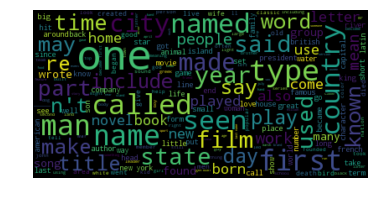

In [12]:
questions = pd.read_csv('questions.csv')
quest_data = pd.DataFrame(questions)
quest_text = quest_data['question_text'].str.cat(sep=' ')

stopWords = set(stopwords.words('english')+ ['accepted','blue','red','clue','crew','3'])
words = word_tokenize(quest_text.lower())
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

#generate a wordcloud image
wordcloud = WordCloud(max_font_size=50).generate(' '.join(wordsFiltered))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')



#plt.figure()

plt.axis("off")
#plt.show()
#print(set(stopwords.words('english')))
#print(words[:12])

    Propose further research: I'd like to expand the keyword bank and subdivide the fields to compare more specific occupations. It may be interesting to develop a criteria for the dominance of a player; for instance, seeing what percentage of games a champion had won outright before Final Jeopardy!. We could also see which categories have the most triple stumpers. Additionally, I would like to make a heatmap visualization of the world by Jeopardy! answer. Perhaps there are Natural Language Processing techniques in the Thinkful course that would shine more light on the questions and answers, like if certain occupations do better on related categories. Although I don't have any technical knowledge of the principles behind IBM's Watson project, maybe I will after I do the full course.

    Special thanks to Vincent Ramdhanie for his help on this project and for his mentorship during the prep course.